# How to install gen3 and download genetic files inside a Service Workbench bucket

This small tutorial is explaining how to import genetic data from the gen3 platform directly into a Service Workbench bucket

This tutorial is separated into 3 parts:
- We will explain how to install the Gen3-client in the SWB bucket
- We will show 2 methods to download the genetic files hosted on the gen3 platform

# I - Installation of the Gen3 client

The first thing to do is to install the Gen3 client (https://gen3.org/resources/user/gen3-client/)

To do it, run the following scripts in a terminal:

### 1 - Create a new folder for the gen3 client exactly at this location :

In [1]:
mkdir /home/ec2-user/SageMaker/studies/gen3

If you create the folder elsewhere, you will not have the permission to run the client

### 2 - Download the gen3 client 

Go into the gen3 directory :

In [2]:
cd /home/ec2-user/SageMaker/studies/gen3

Download the client from the Gen3 in this directory

In [ ]:
wget https://github.com/uc-cdis/cdis-data-client/releases/download/2023.05/dataclient_linux.zip

### 3 - How to make the client work

Unzip the client file

In [ ]:
unzip dataclient_linux.zip

Verify that you have the permission to execute the file: permissions for gen3-client should look like this : **-rwxrwxr-x**

In [ ]:
ls -l

Add the path to gen3-client as an environment variable

In [ ]:
echo 'export PATH=$PATH:~/SageMaker/studies/gen3' >> ~/.bash_profile

Reinitialize the terminal so it takes into account this environment variable 

In [ ]:
source ~/.bash_profile

Now Gen3 client is installed and the following command should not raise any error

In [ ]:
gen3-client -h

## Download genetic data with the gen3 client

### 1 - Setting your profile

The first thing you need to do is to set up your profile. 

For that, be sure you have your gen3 API key stored into a json file. If you don't have or don't remerber your API key, you can generate a new API key in your profile tab on the Gen3 platform website : https://gen3.biodatacatalyst.nhlbi.nih.gov/identity.

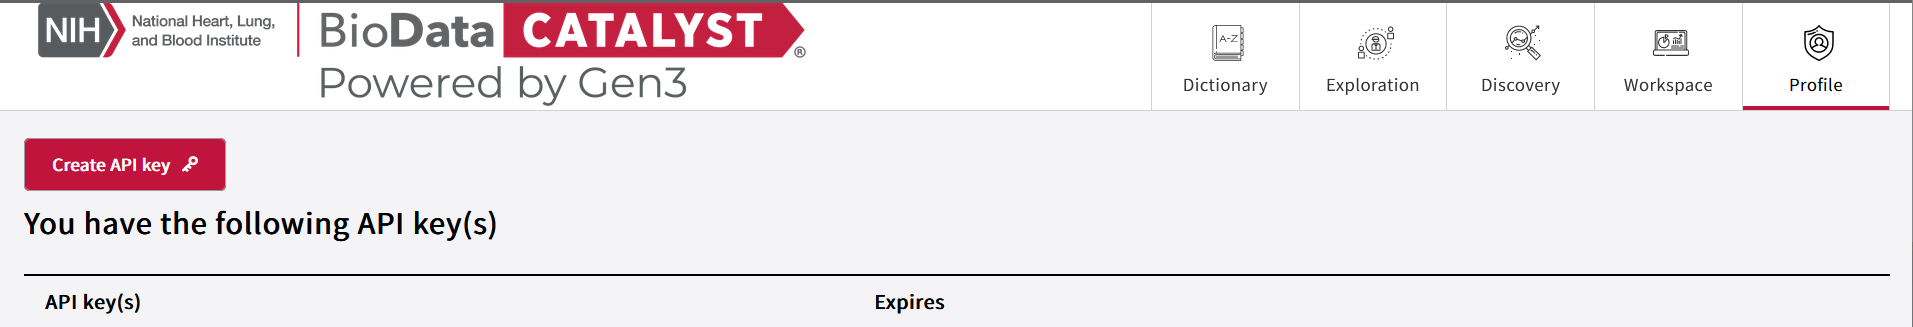

When creating this new API key, you have the option to directly download it into the json format.

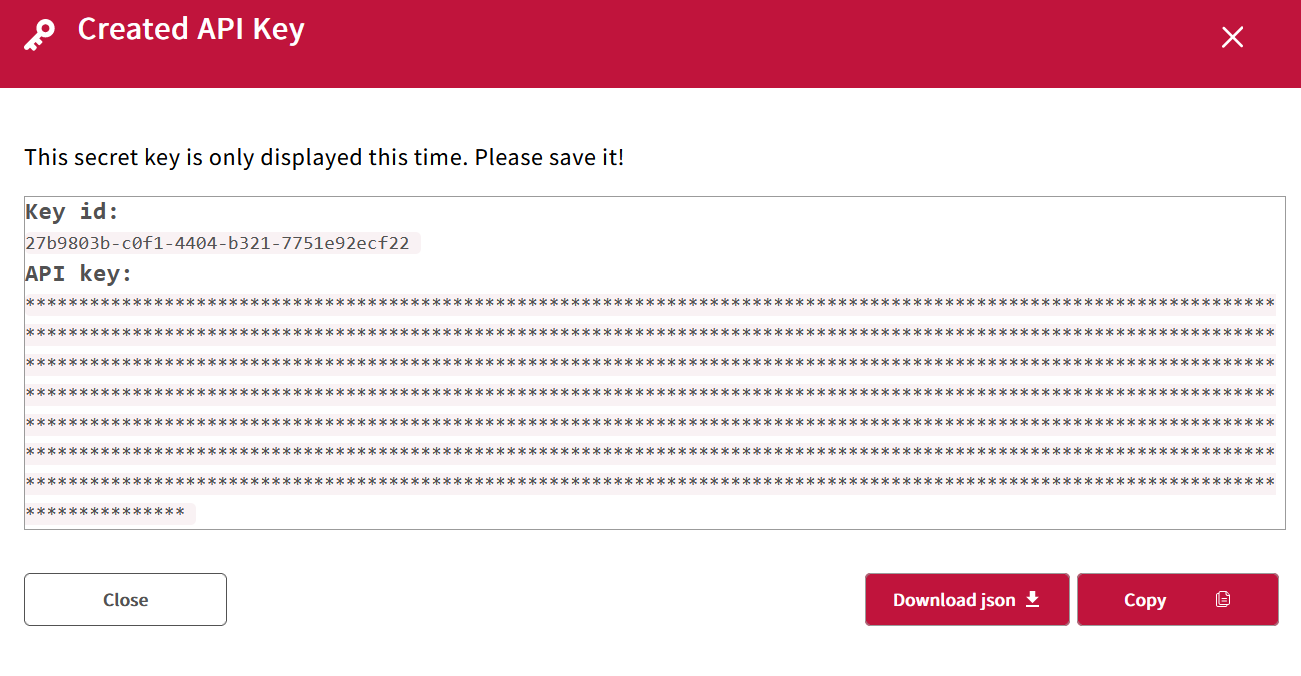

Upload manually the json file, (called here "credentials.json") containing for API key in the gen3 folder we created during the installation steps.

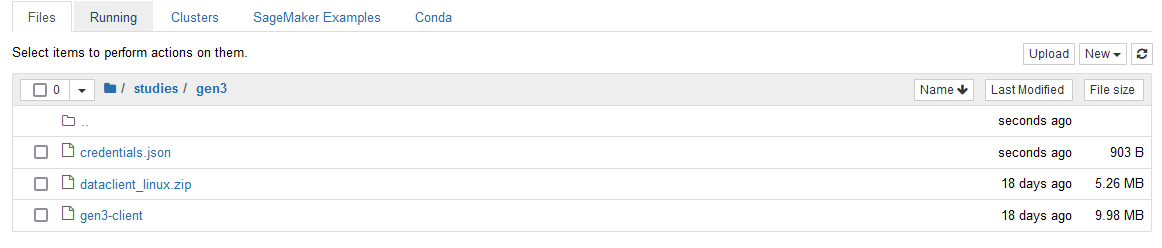

Then run this command (If your file containing your API key is named differently, change the path name)

In [ ]:
gen3-client configure --profile=demo --cred=~/SageMaker/studies/gen3/credentials.json --apiendpoint=https://gen3.biodatacatalyst.nhlbi.nih.gov/

Your profile is now set up.

### 2 - Download a single genetic file with the GUID

If you want to download a single file or a small amount of file, this is the prefered method.

First identify on the Gen3 website the files you want to download. You can browse and filter these files in the exploration tab.

When you have identify the file you want to download, search for the GUID associated. This GUID should be of the form : 
**a7f8s5f4g-6t12-489a-afg4-ef154df4545f**. This object ID point to the file you want to download.

(NB : Sometime you will find the GUID in this from : **dg.4503/a7f8s5f4g-6t12-489a-afg4-ef154df4545f**, you just need to remove the part before the backslash : **a7f8s5f4g-6t12-489a-afg4-ef154df4545f**)

Use the following command to doanload the file (replace the GUID by your GUID):

In [ ]:
gen3-client download-single --profile=demo --guid=a7f8s5f4g-6t12-489a-afg4-ef154df4545f --no-prompt --skip-completed

The file will be downloaded into the gen3 folder. You can move this file into a better place after

### 3 - Download multiple files with manifest

You can also download multiple files using manifest. It is the prefered method if you want to download files for many individuals from the same cohort 

First you need to use the filters in the exploration tab to select the files you want to download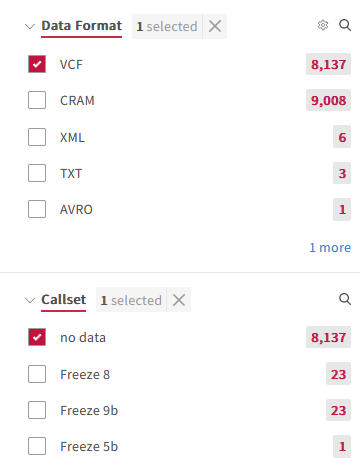

When your files are selected, you can download a json file called **"file-manifest.json"**. It contain the GUID and the information of all the files you want to download.
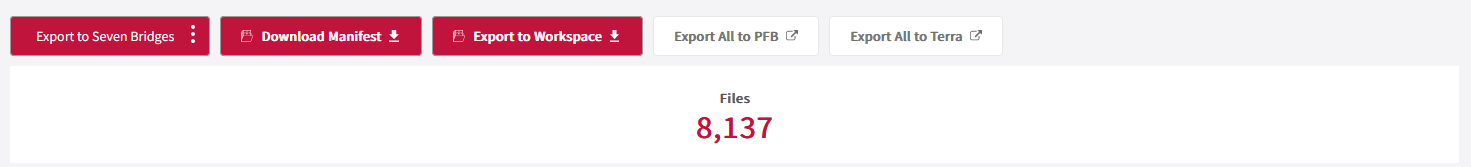

Upload manually this file into your gen3 folder in the SWB bucket
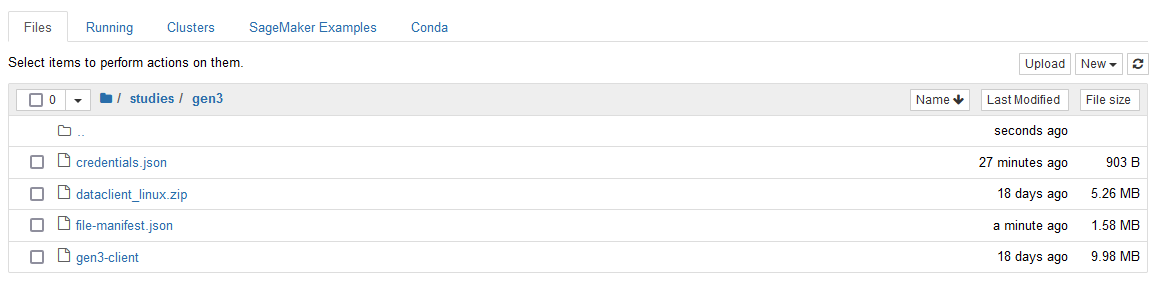

You can now download your files by running the following command: (you need to add a download path)

In [ ]:
gen3-client download-multiple --profile=demo --manifest=file_manifest.json --download-path=<download_path>

## Additional notes

The Gen3 folder is a temporary folder and will be deleted if you stop the workspace you are using. 
Don't forget to move the files you have downloaded into a permanent folder before closing your workspace